In [1]:
!wget https://raw.githubusercontent.com/microsoft/ML-For-Beginners/0bdc5077070e3cca43d5498e8ffdc46b87a3bf4a/2-Regression/data/US-pumpkins.csv

--2021-10-26 14:24:51--  https://raw.githubusercontent.com/microsoft/ML-For-Beginners/0bdc5077070e3cca43d5498e8ffdc46b87a3bf4a/2-Regression/data/US-pumpkins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172012 (168K) [text/plain]
Saving to: ‘US-pumpkins.csv’

US-pumpkins.csv     100%[===================>] 167.98K  --.-KB/s    in 0.02s   

2021-10-26 14:24:51 (7.33 MB/s) - ‘US-pumpkins.csv’ saved [172012/172012]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pumpkins = pd.read_csv('US-pumpkins.csv')

In [3]:
pumpkins.dtypes

City Name           object
Type                object
Package             object
Variety             object
Sub Variety         object
Grade              float64
Date                object
Low Price          float64
High Price         float64
Mostly Low         float64
Mostly High        float64
Origin              object
Origin District     object
Item Size           object
Color               object
Environment        float64
Unit of Sale        object
Quality            float64
Condition          float64
Appearance         float64
Storage            float64
Crop               float64
Repack              object
Trans Mode         float64
Unnamed: 24        float64
Unnamed: 25         object
dtype: object

In [10]:
pumpkins.isnull().sum()/len(pumpkins)

City Name          0.000000
Type               0.974388
Package            0.000000
Variety            0.002846
Sub Variety        0.831531
Grade              1.000000
Date               0.000000
Low Price          0.000000
High Price         0.000000
Mostly Low         0.058623
Mostly High        0.058623
Origin             0.001707
Origin District    0.925441
Item Size          0.158793
Color              0.350598
Environment        1.000000
Unit of Sale       0.907797
Quality            1.000000
Condition          1.000000
Appearance         1.000000
Storage            1.000000
Crop               1.000000
Repack             0.000000
Trans Mode         1.000000
Unnamed: 24        1.000000
Unnamed: 25        0.941377
dtype: float64

In [11]:
numerical = [num_col for num_col in list(pumpkins.columns) if pumpkins[num_col].dtype == 'float64']

In [12]:
#Too many null values, plot histogram for  only low price and high price
pumpkins[numerical].isnull().sum()/len(pumpkins)

Grade          1.000000
Low Price      0.000000
High Price     0.000000
Mostly Low     0.058623
Mostly High    0.058623
Environment    1.000000
Quality        1.000000
Condition      1.000000
Appearance     1.000000
Storage        1.000000
Crop           1.000000
Trans Mode     1.000000
Unnamed: 24    1.000000
dtype: float64

In [13]:
sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0ca3b27d0>,
      dtype=object)

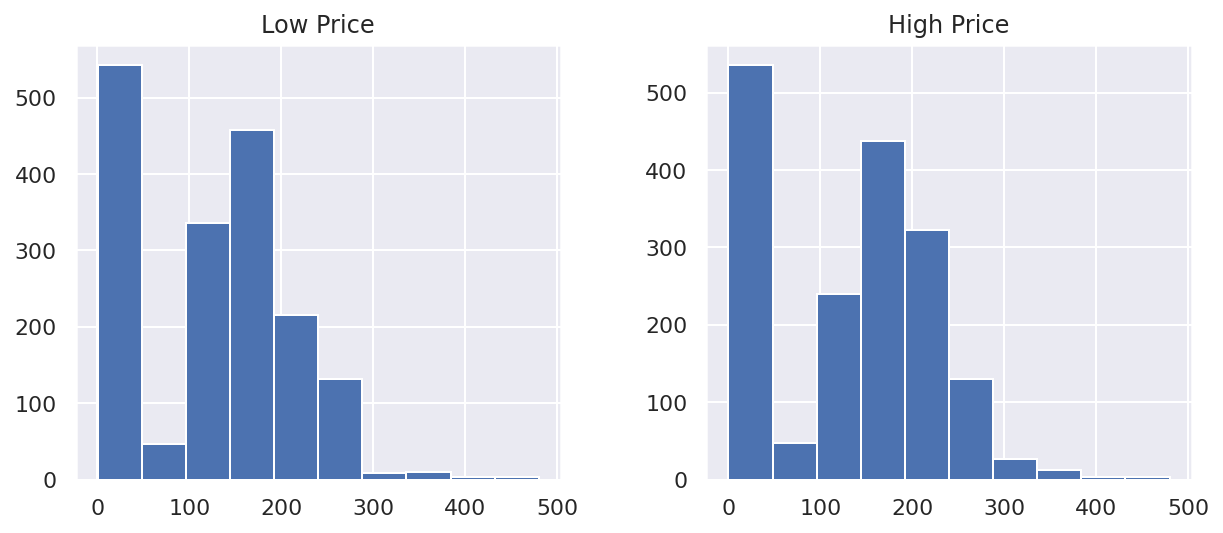

In [14]:
features = ['Low Price', 'High Price']
pumpkins[features].hist(figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0ca311410>,
      dtype=object)

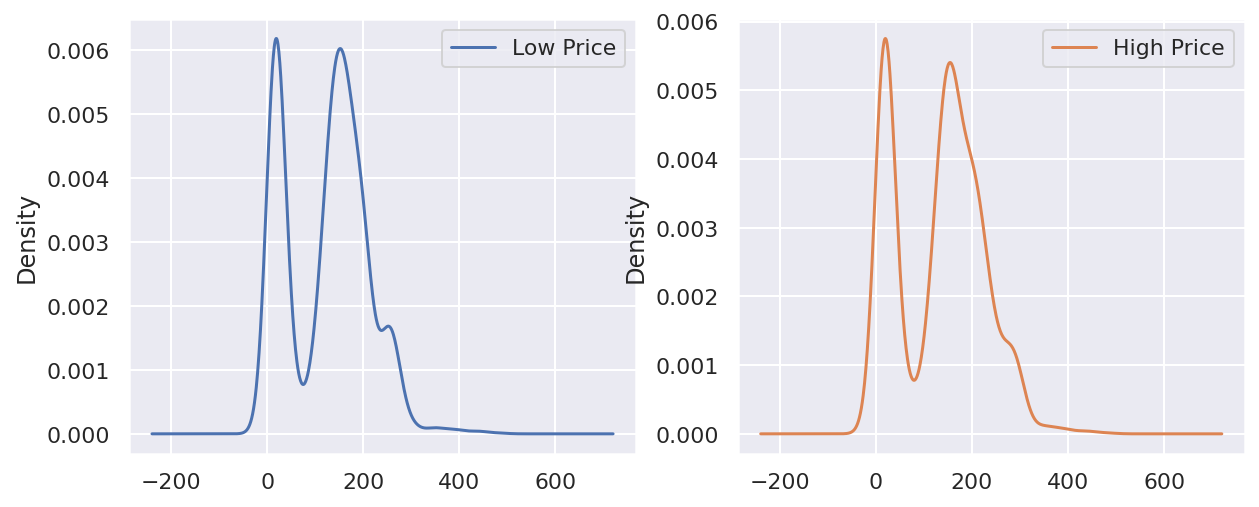

In [15]:
#use density plot to check distribution of price
pumpkins[features].plot(kind='density',subplots=True,sharex=True,layout=(1,2), figsize=(10,4))

In [16]:
pumpkins.columns

Index(['City Name', 'Type', 'Package', 'Variety', 'Sub Variety', 'Grade',
       'Date', 'Low Price', 'High Price', 'Mostly Low', 'Mostly High',
       'Origin', 'Origin District', 'Item Size', 'Color', 'Environment',
       'Unit of Sale', 'Quality', 'Condition', 'Appearance', 'Storage', 'Crop',
       'Repack', 'Trans Mode', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

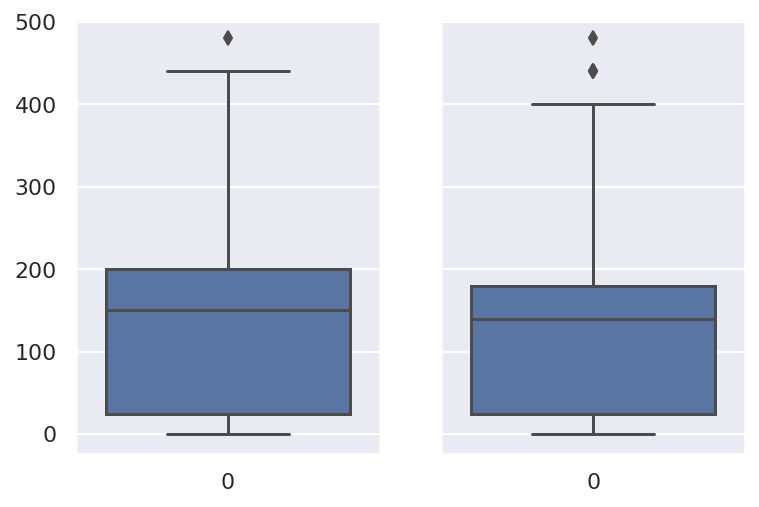

In [18]:
#checking how spread out price is
fig, axes = plt.subplots(1,2, sharey=True, figsize=(6, 4))
h_price = sns.boxplot(data=pumpkins['High Price'], ax=axes[0])
l_price = sns.boxplot(data=pumpkins['Low Price'], ax=axes[1])


In [19]:
pumpkins[['High Price', 'Low Price']].describe()

,High Price,Low Price
count,1757.000000,1757.000000
mean,132.970939,124.571338
std,89.524958,83.876591
min,0.240000,0.240000
25%,24.500000,24.000000
50%,150.000000,140.000000
75%,200.000000,180.000000
max,480.000000,480.000000


In [20]:
obj_col = list(set(pumpkins.columns) - set(numerical))

In [21]:
pumpkins[obj_col].isnull().sum()/len(pumpkins)

Date               0.000000
Package            0.000000
Sub Variety        0.831531
Unnamed: 25        0.941377
Repack             0.000000
City Name          0.000000
Color              0.350598
Origin District    0.925441
Variety            0.002846
Unit of Sale       0.907797
Type               0.974388
Origin             0.001707
Item Size          0.158793
dtype: float64

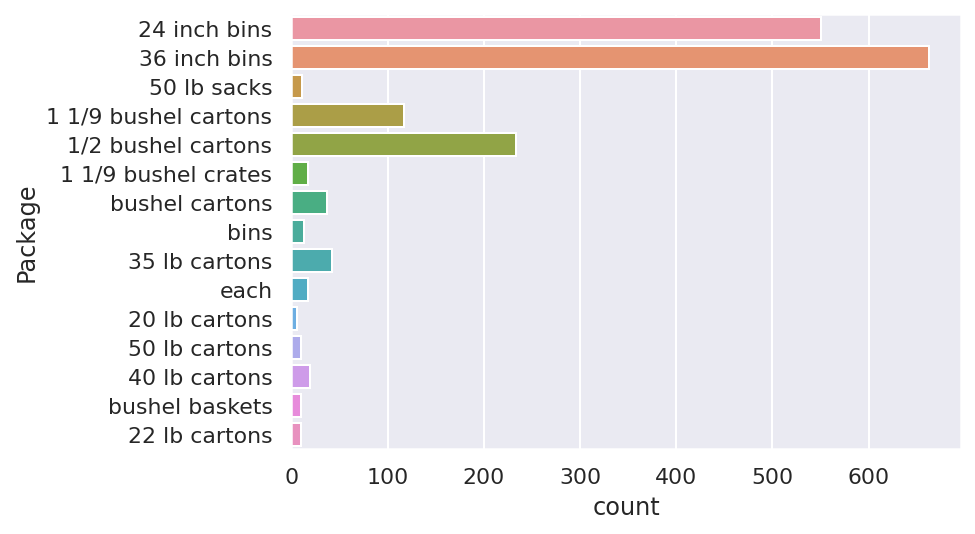

In [22]:
sns.countplot(y='Package',data=pumpkins)

In [24]:
pumpkins.corr()

,Grade,Low Price,High Price,Mostly Low,Mostly High,Environment,Quality,Condition,Appearance,Storage,Crop,Trans Mode,Unnamed: 24
Grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Low Price,NaN,1.000000,0.987353,0.997543,0.991106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
High Price,NaN,0.987353,1.000000,0.989539,0.996174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mostly Low,NaN,0.997543,0.989539,1.000000,0.992581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mostly High,NaN,0.991106,0.996174,0.992581,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Environment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Appearance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Storage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Too many null values couldn't check for correlation properly
